# Rickettsiosis - Data Analysis

### Import libraries

In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading data

In [3]:
DATAPATH = '../data/csv/data.csv'

df = pd.read_csv(DATAPATH)    # reading data

In [4]:
df.head()

,state,year,week,week_cases,m_accum,f_accum,cases_accum
0,Aguascalientes,2013,2,NaN,NaN,NaN,NaN
1,Baja California,2013,2,NaN,NaN,NaN,3.0
2,Baja California Sur,2013,2,NaN,NaN,NaN,NaN
3,Campeche,2013,2,NaN,NaN,NaN,NaN
4,Coahuila,2013,2,NaN,NaN,NaN,1.0


### Data cleaning 

In [13]:
df.shape

(7008, 7)

Se observa que el dataframe (tabla) contiene 7008 filas y 7 columnas.

In [17]:
df.columns

Index(['state', 'year', 'week', 'week_cases', 'm_accum', 'f_accum',
       'cases_accum'],
      dtype='object')

**EXPLAIN EACH COLUMN**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 7 columns):
state          7008 non-null object
year           7008 non-null int64
week           7008 non-null int64
week_cases     294 non-null float64
m_accum        1162 non-null float64
f_accum        1233 non-null float64
cases_accum    748 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 383.3+ KB


Existen algunas columnas con valores faltantes.

In [10]:
df.describe()    # basic descriptive analysis of numerical data

,year,week,week_cases,m_accum,f_accum,cases_accum
count,7008.000000,7008.000000,294.000000,1162.000000,1233.000000,748.000000
mean,2014.648402,25.812785,2.714286,6.249570,8.622060,44.239305
std,1.245953,15.216634,4.176155,13.241207,15.940735,103.366494
min,2013.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2014.000000,12.000000,1.000000,1.000000,2.000000,2.000000
50%,2015.000000,25.000000,1.000000,2.000000,3.000000,5.000000
75%,2016.000000,39.000000,3.000000,5.000000,8.000000,35.000000
max,2017.000000,53.000000,33.000000,137.000000,171.000000,988.000000


- Se observa que los datos vienen de los años 2013 hasta 2017.




In [21]:
df.describe(include=['object'])    # statistics on non-numerical features

,state
count,7008
unique,33
top,Hidalgo
freq,219


**Sorting by column week_cases**

In [27]:
df.sort_values(by=['week_cases'], ascending=False).head(50)

,state,year,week,week_cases,m_accum,f_accum,cases_accum
4641,Baja California,2015,44,33.0,101.0,139.0,NaN
4609,Baja California,2015,43,33.0,85.0,122.0,NaN
4577,Baja California,2015,42,25.0,76.0,98.0,NaN
4673,Baja California,2015,45,22.0,110.0,152.0,NaN
4705,Baja California,2015,46,21.0,125.0,160.0,NaN
4481,Baja California,2015,39,21.0,54.0,63.0,NaN
4513,Baja California,2015,40,21.0,62.0,76.0,NaN
4449,Baja California,2015,38,16.0,48.0,48.0,NaN
4737,Baja California,2015,47,14.0,130.0,169.0,NaN
4545,Baja California,2015,41,11.0,67.0,82.0,NaN


De la tabla se puede observar: 

- Se muestran el top 50 de la mayor cantidad de casos en una sola semana. 
- La mayor cantidad de casos en una semana fue de 33, sucedió dos veces en semanas consecutivas (sem 43 y 44) en 2015 en el estado de Baja California. 
- En Baja California durante 2015 existió un periodo durante el cual se registraron muchos casos por semana. 
- Además de Baja California, Sonora es otro estado donde existieron muchos casos en una sola semana. 


In [34]:
df['week_cases'].mean()

2.7142857142857144

En México hubo un promedio de 2.71 casos por semana. 

¿Cuántos casos por semana en promedio hubieron en Sonora?

In [41]:
df[df['state'] == 'Sonora']['week_cases'].mean()

2.710843373493976

El promedio de casos de Sonora también es de 2.71, básicamente igual al de todo el país. 

**Casos por semana**

In [56]:
states = df['state'].unique()    # list of states

for state in states: 
    print((state, df[df['state'] == state]['week_cases'].mean()))

('Aguascalientes', nan)
('Baja California', 6.826923076923077)
('Baja California Sur', 1.4193548387096775)
('Campeche', 1.0)
('Coahuila', 1.4893617021276595)
('Colima', 2.0)
('Chiapas', 1.0)
('Chihuahua', 1.25)
('Distrito Federal', nan)
('Durango', 1.0)
('Guanajuato', 1.375)
('Guerrero', 1.3333333333333333)
('Hidalgo', nan)
('Jalisco', 1.0)
('México', nan)
('Michoacán', 1.3333333333333333)
('Morelos', 1.1666666666666667)
('Nayarit', nan)
('Nuevo León', 1.1666666666666667)
('Oaxaca', nan)
('Puebla', nan)
('Querétaro', nan)
('Quintana Roo', 2.0)
('San Luis Potosí', 1.0)
('Sinaloa', 1.3529411764705883)
('Sonora', 2.710843373493976)
('Tabasco', nan)
('Tamaulipas', 1.3333333333333333)
('Tlaxcala', nan)
('Veracruz', 1.0)
('Yucatán', nan)
('Zacatecas', 3.0)
('Ciudad de México', nan)


Se muestra el promedio de casos por semana en cada uno de los estados de la república.

In [57]:
df.apply(np.max)

state          Zacatecas
year                2017
week                  53
week_cases            33
m_accum              137
f_accum              171
cases_accum          988
dtype: object

### Plotting

ValueError: max must be larger than min in range parameter.

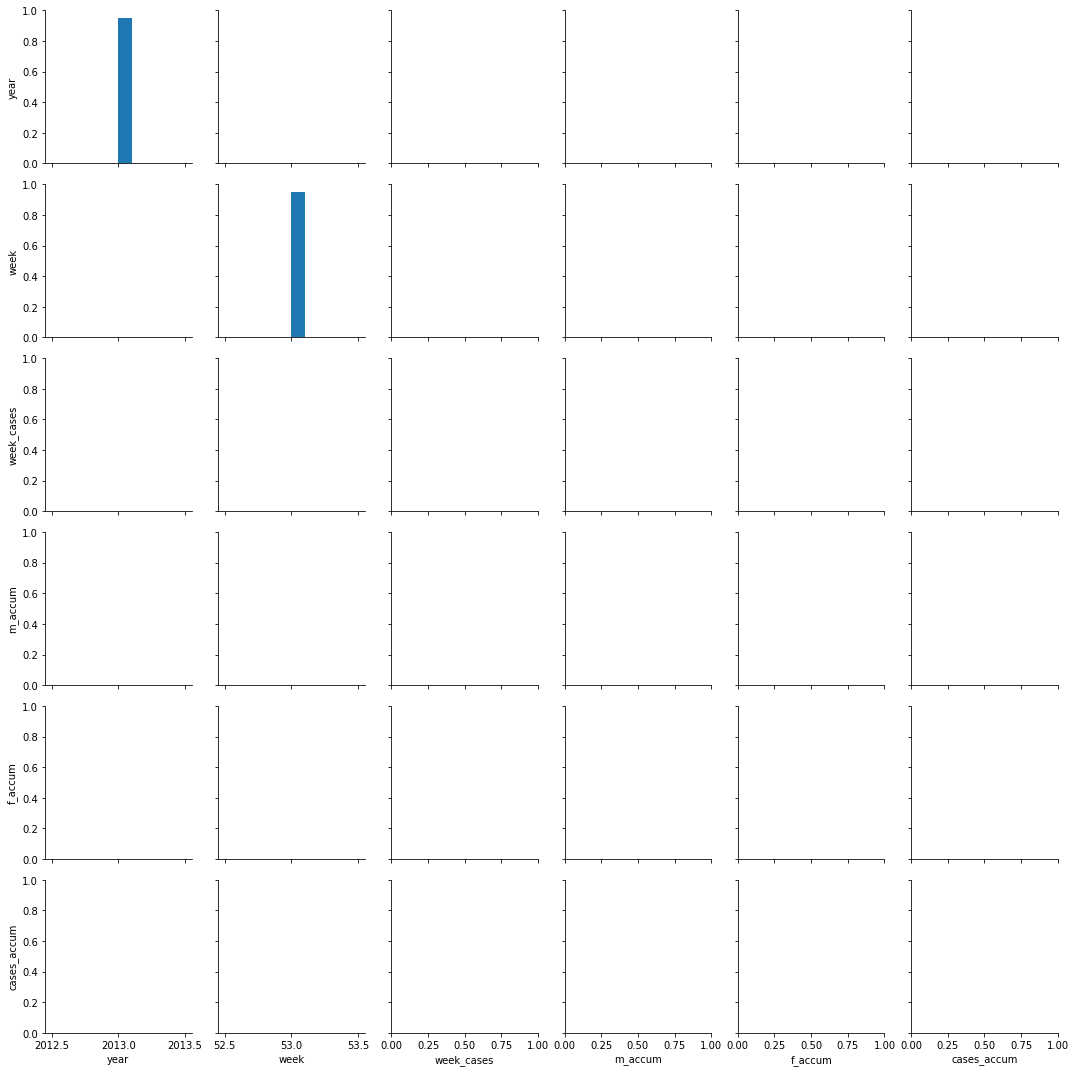

In [84]:
sns.pairplot(df[1632:1664])    # 2013 summary

Keep working based on:
- https://github.com/roemvaar/data-science-projects/blob/master/911-calls-data-capstone-project.ipynb
- https://github.com/roemvaar/data-science-projects/blob/master/finance-project.ipynb
- https://towardsdatascience.com/hitchhikers-guide-to-exploratory-data-analysis-6e8d896d3f7e?gi=455440dae33a- https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python